In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import datetime 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
my_data=pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385124 entries, 0 to 385123
Data columns (total 18 columns):
CAMIS                    385124 non-null int64
DBA                      384734 non-null object
BORO                     385124 non-null object
BUILDING                 384884 non-null object
STREET                   385120 non-null object
ZIPCODE                  379203 non-null float64
PHONE                    385121 non-null object
CUISINE DESCRIPTION      385124 non-null object
INSPECTION DATE          385124 non-null object
ACTION                   384014 non-null object
VIOLATION CODE           379276 non-null object
VIOLATION DESCRIPTION    377256 non-null object
CRITICAL FLAG            385124 non-null object
SCORE                    366070 non-null float64
GRADE                    194586 non-null object
GRADE DATE               193010 non-null object
RECORD DATE              385124 non-null object
INSPECTION TYPE          384014 non-null object
dtypes: float64(2), int6

In [4]:
my_data.GRADE.unique()

array(['A', nan, 'B', 'Not Yet Graded', 'Z', 'P', 'C', 'G'], dtype=object)

In [5]:
my_data.SCORE.describe()

count    366070.000000
mean         19.550381
std          13.928281
min          -1.000000
25%          11.000000
50%          14.000000
75%          25.000000
max         156.000000
Name: SCORE, dtype: float64

In [6]:
my_data.isna().any()

CAMIS                    False
DBA                       True
BORO                     False
BUILDING                  True
STREET                    True
ZIPCODE                   True
PHONE                     True
CUISINE DESCRIPTION      False
INSPECTION DATE          False
ACTION                    True
VIOLATION CODE            True
VIOLATION DESCRIPTION     True
CRITICAL FLAG            False
SCORE                     True
GRADE                     True
GRADE DATE                True
RECORD DATE              False
INSPECTION TYPE           True
dtype: bool

## 1. making sure we retain cases with CAMIS ID, REMOVING ANY EMPTY ENTRY

In [7]:
my_data = my_data[pd.notnull(my_data['CAMIS'])]
my_data.isna().any()

CAMIS                    False
DBA                       True
BORO                     False
BUILDING                  True
STREET                    True
ZIPCODE                   True
PHONE                     True
CUISINE DESCRIPTION      False
INSPECTION DATE          False
ACTION                    True
VIOLATION CODE            True
VIOLATION DESCRIPTION     True
CRITICAL FLAG            False
SCORE                     True
GRADE                     True
GRADE DATE                True
RECORD DATE              False
INSPECTION TYPE           True
dtype: bool

In [8]:
my_data.nunique()

CAMIS                    26963
DBA                      21315
BORO                         6
BUILDING                  7307
STREET                    3277
ZIPCODE                    223
PHONE                    25485
CUISINE DESCRIPTION         85
INSPECTION DATE           1389
ACTION                       5
VIOLATION CODE              99
VIOLATION DESCRIPTION       91
CRITICAL FLAG                3
SCORE                      132
GRADE                        7
GRADE DATE                1296
RECORD DATE                  1
INSPECTION TYPE             32
dtype: int64

## 2.Best restaurants with score lest than 14

In [9]:
#my_data = my_data[my_data.SCORE < 14]
#my_data.nunique()

In [10]:
#import datetime as dt

#print('Most recent inspection:')
#print(my_data['INSPECTION DATE'].max())

#lastDate = dt.datetime(2017,9,9)
#my_data['INSPECTION DATE'] = pd.to_datetime(my_data['INSPECTION DATE'])

In [11]:
# checking missing data in data 
total = my_data.isnull().sum().sort_values(ascending = False)
percent = (my_data.isnull().sum()/my_data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GRADE DATE,192114,49.883674
GRADE,190538,49.474455
SCORE,19054,4.947497
VIOLATION DESCRIPTION,7868,2.042978
ZIPCODE,5921,1.537427


Text(0.5, 0, 'Score')

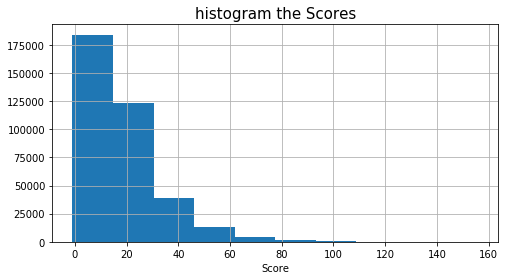

In [12]:
my_data.SCORE.hist(figsize=(8,4))
plt.title("histogram the Scores", fontsize=15)
plt.xlabel('Score', fontsize = 10)

Text(0.5, 1.0, 'Distribution Plot of the Scores')

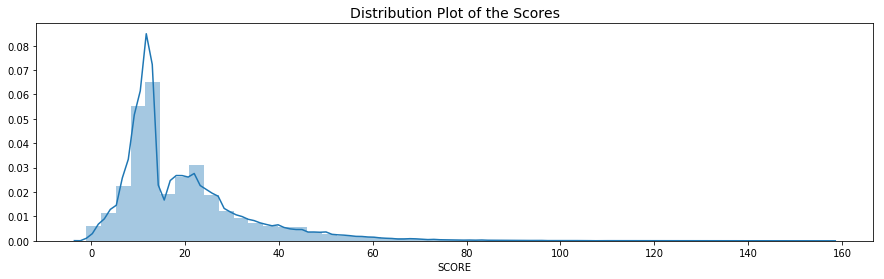

In [13]:
# Have a look at a distribution plot of the Score
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(my_data.SCORE.dropna())
plt.title("Distribution Plot of the Scores", fontsize=14)

In [14]:
my_data.GRADE.value_counts()

A                 154161
B                  24545
C                   7894
Z                   4042
P                   2361
Not Yet Graded      1579
G                      4
Name: GRADE, dtype: int64

In [ ]:
# A look at the histogram of the Grades.
my_data.GRADE.hist(figsize = (15, 4))
plt.title("Histogram of the Grades", fontsize=14)
plt.xlabel('Grades', fontsize = 10)

In [ ]:
# Lets look at scores by grades
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(my_data.SCORE.dropna(), my_data.GRADE)
plt.title('Boxplot by Grade', fontsize = 15)

In [ ]:
# Look at whih Boroughs have the highest number of inspections
my_data.BORO.value_counts()

In [ ]:
# Here is a look at a histogram of the numbers we just saw above.
my_data.BORO.hist(figsize = (15, 4))
plt.title('Boxplot of the count of inspections per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 12)

In [ ]:
# Breakdown scores by borough
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(my_data.SCORE.dropna(), my_data.BORO)
plt.title('Boxplot by Borough', fontsize = 15)

In [ ]:
# Contingency table for Grade and Borough
boro_grade = pd.crosstab(my_data.GRADE, data.BORO, margins = True)
boro_grade

In [ ]:
# Plot of grade by borough
pd.crosstab(my_data.BORO, my_data.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15)

In [ ]:
# Test if the grades are independent of the borough
boro_grade.columns = ["BRONX","BROOKLYN","MANHATTAN", "QUEENS", "STATEN ISLAND" ,"All"]

boro_grade.index = ["A","B","C","Not Yet Graded","P", "Z", "All"]

observed = boro_grade.ix[0:6,0:5]   # Get table without totals for later use

expected =  np.outer(boro_grade["All"][0:6],
                     boro_grade.ix["All"][0:5]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["BRONX","BROOKLYN","MANHATTAN", "QUEENS", "STATEN ISLAND"]
expected.index = ["A","B","C","Not Yet Graded","P", "Z"]

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print("Chi Squared Stat")
print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 20)   # (5-1) * (6-1)

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=20)
print("P value")
print(p_value)

stats.chi2_contingency(observed= observed)

As expected, given the small p-value, the test result detects a significant relationship between the variables

In [ ]:
my_data['CUISINE DESCRIPTION'].value_counts()

In [ ]:
# Let us look at the scores by cuisine
score_cuisine = pd.concat([my_data['CUISINE DESCRIPTION'], my_data['SCORE']], axis=1)
f, ax = plt.subplots(figsize=(22, 12))
fig = sns.boxplot(x = 'CUISINE DESCRIPTION', y="SCORE", my_data = score_cuisine)
plt.xticks(rotation=90);

In [ ]:
my_data.ACTION.value_counts()

The most common action taken was citing the violation

In [ ]:
# Histogram of the Action taken
my_data.ACTION.hist(figsize = (15,8))
plt.title('Histogram of the Action taken', fontsize = 15)
plt.xlabel('Action', fontsize = 12)
plt.xticks(rotation=90)

In [ ]:
data['CRITICAL FLAG'].value_counts()

Critical violations are those most likely to contribute to foodborne illness and most cases were critical

In [ ]:
# Graphical representation of the critical flag
my_data['CRITICAL FLAG'].hist(figsize=(15,4))
plt.title('Histogram of the Critical Flag', fontsize = 15)
plt.xlabel('Flag', fontsize = 12)

In [ ]:
# Critical Flag by Borough
pd.crosstab(my_data.BORO, my_data['CRITICAL FLAG']).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Critical Flag by Borough', fontsize = 15)

In [ ]:
# Critical Flag by Cuisine
pd.crosstab(my_data['CUISINE DESCRIPTION'], my_data['CRITICAL FLAG']).plot(kind="bar", figsize=(18,18), stacked=True)
plt.title('Critical Flag by Cuisine', fontsize = 15)

In [ ]:
# Let us look at the scores by critical flag
score_flag = pd.concat([my_data['CRITICAL FLAG'], my_data['SCORE']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x = 'CRITICAL FLAG', y="SCORE", my_data = score_flag)
plt.title('Score by Critical Flag', fontsize = 15)
plt.xticks(rotation=90);

In [ ]:
my_data['INSPECTION TYPE'].value_counts()

In [ ]:
import re
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()# lowercase text  
    text = REPLACE_BY_SPACE_RE.sub(' ',text)# replace REPLACE_BY_SPACE_RE symbols by space in text    
    text = BAD_SYMBOLS_RE.sub('',text)# delete symbols which are in BAD_SYMBOLS_RE from text    
    temp = [s.strip() for s in text.split() if s not in STOPWORDS]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

In [ ]:
# Let us create a word cloud for the violation description
temp_data = my_data.dropna(subset=['VIOLATION DESCRIPTION'])
# converting into lowercase
temp_data['VIOLATION DESCRIPTION'] = temp_data['VIOLATION DESCRIPTION'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp_data['VIOLATION DESCRIPTION'] = temp_data['VIOLATION DESCRIPTION'].map(text_prepare)


from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(temp_data['VIOLATION DESCRIPTION'].values))
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title("Top Words Used for the Violation Descriptions", fontsize=25)
plt.axis("off")
plt.show() 

Looking at the cloud above it seems as if most of the violaions are to do with nonfood contact and the surfaces the food is in contact with.

Conclusions
From looking at the variables above we can see some differences across the boroughs and also the cuisine. We can see that the action taken is also different depending on what the score of the inspection is, so if we were to build a prediction model to determine what action was to be taken it wold be important to include the score variable in that model I would think. There is more work to be done with this data.

In [ ]:
print('Null Variables: ', my_data.columns[my_data.isnull().any()].tolist())

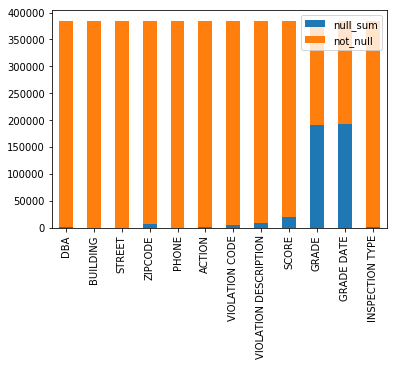

In [39]:
null_var = ['DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'SCORE', 'GRADE',
       'GRADE DATE', 'INSPECTION TYPE']
null_cnt = my_data[null_var].isnull().sum()
null_cnt = null_cnt.to_frame()
null_cnt.columns = ['null_sum']
null_cnt['not_null'] = my_data.shape[0] - null_cnt['null_sum']
null_cnt.plot.bar(stacked = True)

In [40]:
null_test = my_data.columns[my_data.columns.str.contains('LATION')].tolist()
null_test2 = ['SCORE']
my_data[null_test+null_test2].isnull().sum()

VIOLATION CODE            5848
VIOLATION DESCRIPTION     7868
SCORE                    19054
dtype: int64

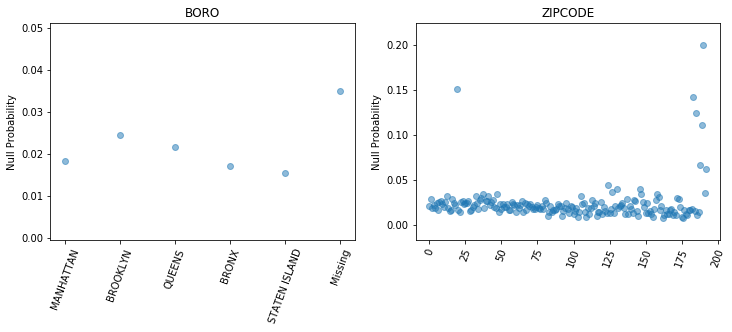

In [41]:
local_lst = ['BORO','ZIPCODE']
f = plt.figure(figsize = (12,4))

tmp_null = my_data[null_test].isnull()
tmp_null = (tmp_null.iloc[:,0] | tmp_null.iloc[:,1])

ax = f.add_subplot(1,2,1)
local = local_lst[0]
tmp = my_data.loc[tmp_null, local].value_counts().to_frame()
tmp2 = my_data.loc[:,local].value_counts().to_frame()
null_ratio = (tmp/tmp2.loc[tmp.index,:])
ax.scatter(x = np.arange(null_ratio.shape[0]) ,y = null_ratio.iloc[:,0], alpha = 0.5)
ax.set_title(local)
ax.set_ylabel('Null Probability')
ax.set_xticklabels(['wow'] + tmp.index.tolist())
ax.tick_params('x', rotation = 70)

ax = f.add_subplot(1,2,2)
local = local_lst[1]
tmp = my_data.loc[tmp_null, local].value_counts().to_frame()
tmp2 = my_data.loc[:,local].value_counts().to_frame()
null_ratio = (tmp/tmp2.loc[tmp.index,:])
ax.scatter(x = np.arange(null_ratio.shape[0]) ,y = null_ratio.iloc[:,0], alpha = 0.5)
ax.set_title(local)
ax.set_ylabel('Null Probability')
ax.tick_params('x', rotation = 70)

plt.show()


In [42]:
my_data.groupby('BORO')['BORO'].size()['Missing']

114

In [43]:
my_data = my_data.loc[my_data.ZIPCODE.isin(null_ratio[null_ratio.sort_values('ZIPCODE') < 0.2].index),:]
my_data = my_data.loc[(my_data.BORO != 'Missing'),:]

In [44]:
my_data.shape

(378360, 18)

In [45]:
def level_code(row):
    if type(row) == float: return 99, 'No'
    return int(row[:2]), row[2]
my_data['VIO_lvl'],my_data['VIO_type'] = zip(*my_data['VIOLATION CODE'].apply(lambda row: level_code(row)))
#my_data['RECORD_DATE'] = pd.to_datetime(my_data['RECORD DATE'], format = '%m/%d/%Y', errors='coerce')
my_data['INSPECTION_DATE'] = pd.to_datetime(my_data['INSPECTION DATE'], format = '%m/%d/%Y', errors='coerce')
my_data['GRADE_DATE'] = pd.to_datetime(my_data['GRADE DATE'], format = '%m/%d/%Y', errors='coerce')
my_data.drop(['RECORD DATE', 'INSPECTION DATE', 'GRADE DATE'], axis = 1, inplace = True)

my_data.columns = ['_'.join(x.lower().split()) for x in my_data.columns]

In [46]:
tmp_tab = pd.crosstab(my_data['action'], my_data['grade'])
tmp_tab[['A', 'B', 'C', 'P', 'Z', 'Not Yet Graded']]

grade,A,B,C,P,Z,Not Yet Graded
action,,,,,,
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.,0,0,5,0,0,131
Establishment re-closed by DOHMH,0,0,0,0,0,3
Establishment re-opened by DOHMH,5,4,709,2329,418,0
No violations were recorded at the time of this inspection.,631,0,0,0,0,13
Violations were cited in the following area(s).,150521,24144,7079,0,3577,1422


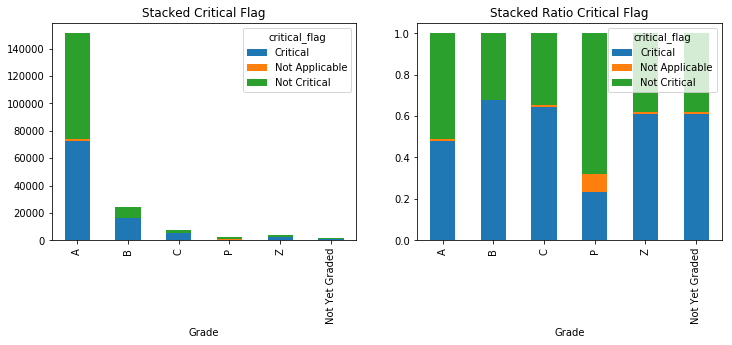

In [47]:
f = plt.figure(figsize = (12,4))
ax = f.add_subplot(1,2,1)
tmp_tab = pd.crosstab(my_data['critical_flag'], my_data['grade'])
tmp_crit = tmp_tab[['A', 'B', 'C', 'P', 'Z', 'Not Yet Graded']].T
tmp_crit.plot.bar(stacked = True, ax = ax)
ax.set_title('Stacked Critical Flag')
ax.set_xlabel('Grade')

sum_ = tmp_crit.sum(axis = 1)
for col in tmp_crit.columns:
    tmp_crit[col] = tmp_crit[col].divide(sum_)
ax = f.add_subplot(1,2,2)
tmp_crit.plot.bar(stacked = True, ax = ax)
ax.set_title('Stacked Ratio Critical Flag')
ax.set_xlabel('Grade')

plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


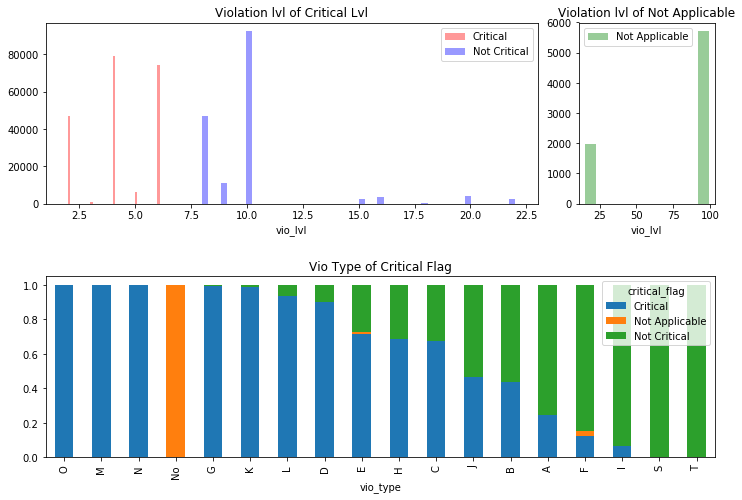

In [48]:
f = plt.figure(figsize = (12,8))
ax = plt.subplot2grid((2,4), (0,0), colspan = 3)
sns.distplot(my_data.vio_lvl.loc[my_data.critical_flag == 'Critical'], ax = ax, kde = False, color = 'r', label = 'Critical')
sns.distplot(my_data.vio_lvl.loc[my_data.critical_flag == 'Not Critical'], ax = ax, kde = False, color = 'b', label = 'Not Critical')
ax.set_title('Violation lvl of Critical Lvl')
ax.legend()
ax = plt.subplot2grid((2,4), (0,3))
sns.distplot(my_data.vio_lvl.loc[my_data.critical_flag == 'Not Applicable'], ax = ax, kde = False, color = 'g', label = 'Not Applicable')
ax.set_title('Violation lvl of Not Applicable')
ax.legend()

ax = plt.subplot2grid((2,4), (1,0), colspan = 4)
tmp_type = my_data[['critical_flag', 'vio_type']].groupby(['critical_flag', 'vio_type']).size().to_frame().reset_index()
tmp_type = tmp_type.pivot('critical_flag', 'vio_type').fillna(0)
tmp_type.columns = tmp_type.columns.droplevel(0)
tmp_type = tmp_type.T
sum_type = tmp_type.sum(axis = 1)
for col in tmp_type.columns:
    tmp_type[col] = tmp_type[col].divide(sum_type)
tmp_type.sort_values('Not Critical').plot.bar(stacked = True, ax = ax)
ax.set_title('Vio Type of Critical Flag')

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.show()

In [49]:
print('OMN')
print(my_data.loc[my_data.vio_type.isin(('O', 'M', 'N')), 'vio_lvl'].value_counts())
print('KL')
print(my_data.loc[my_data.vio_type.isin(('K', 'L')), 'vio_lvl'].value_counts())

OMN
4    28711
Name: vio_lvl, dtype: int64
KL
4     30215
15     1890
Name: vio_lvl, dtype: int64


In [50]:
tmp_cnt =my_data.groupby(['vio_type']).agg({'vio_lvl': pd.Series.nunique}).sort_values('vio_lvl').T
tmp_cnt[sorted(tmp_cnt.columns, reverse = False)]

vio_type,A,B,C,D,E,F,G,H,I,J,K,L,M,N,No,O,S,T
vio_lvl,15,12,11,9,10,11,8,5,5,4,2,2,1,1,1,1,1,1
